In [1]:
# Data analysis libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To display plots inline
%matplotlib inline

In [2]:
# Load the CSV dataset
data = pd.read_csv("online_retail_II.csv", encoding='ISO-8859-1')

# Quick look
data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# Remove missing CustomerID
data = data.dropna(subset=['Customer ID'])

# Remove negative quantities (returns)
data = data[data['Quantity'] > 0]

# Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Calculate Revenue per transaction
data['Revenue'] = data['Quantity'] * data['Price']


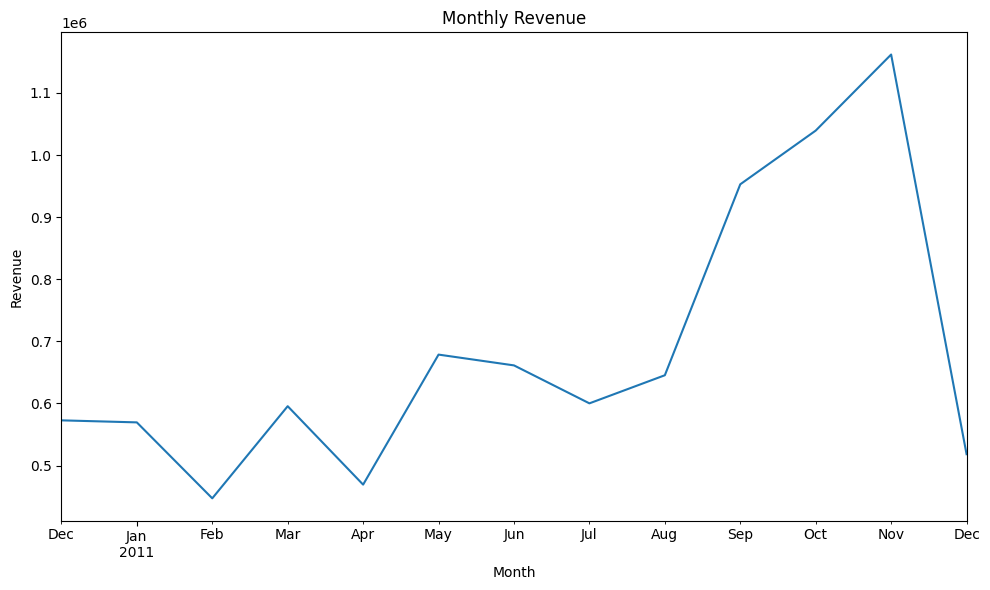

In [7]:
# Group by month
monthly_revenue = data.groupby(data['InvoiceDate'].dt.to_period('M'))['Revenue'].sum()

# Plot
plt.figure(figsize=(10,6))
monthly_revenue.plot(kind='line', title='Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.tight_layout()

# Save plot to visualizations folder
plt.savefig('../visualization/monthly_revenue.png')
plt.show()


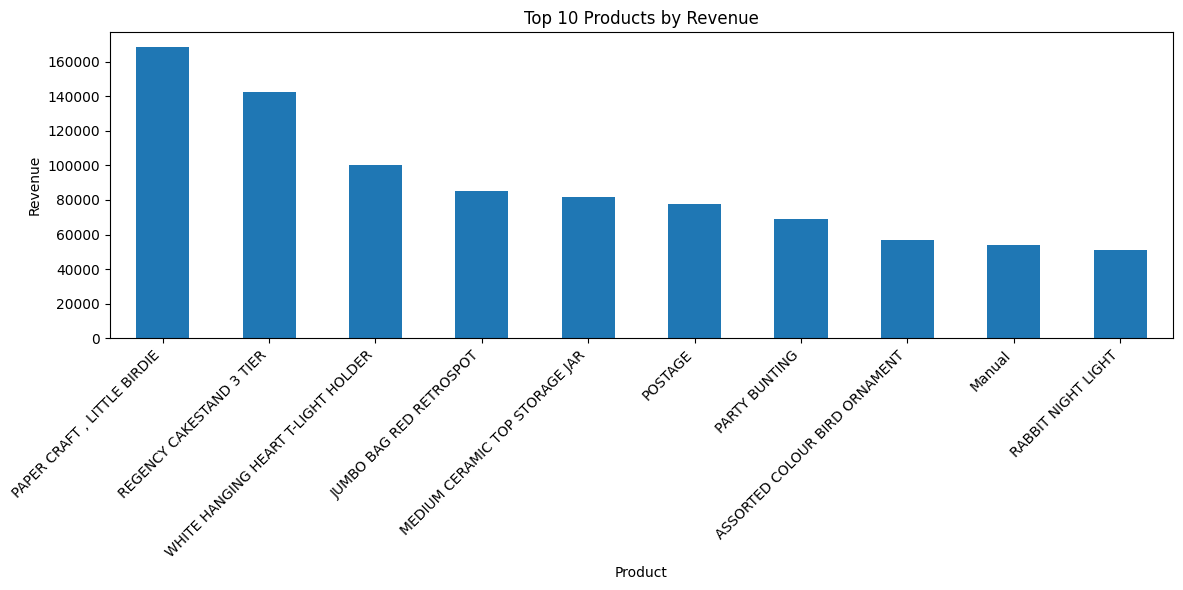

In [8]:
top_products = data.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
top_products.plot(kind='bar')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../visualization/top_products.png')
plt.show()


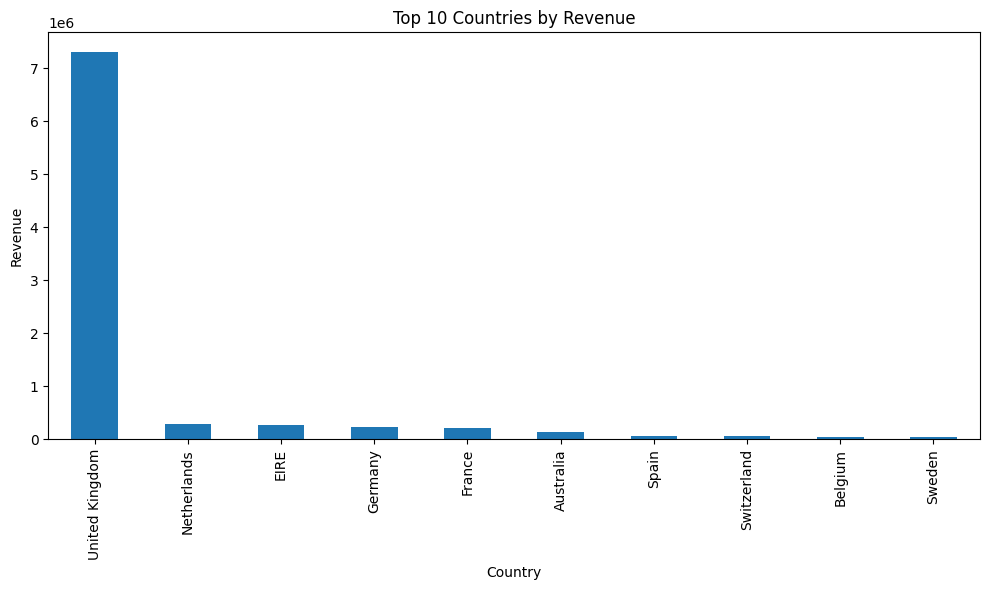

In [10]:
country_sales = data.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
country_sales.plot(kind='bar')
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.tight_layout()
plt.savefig('../visualization/top_countries.png')
plt.show()


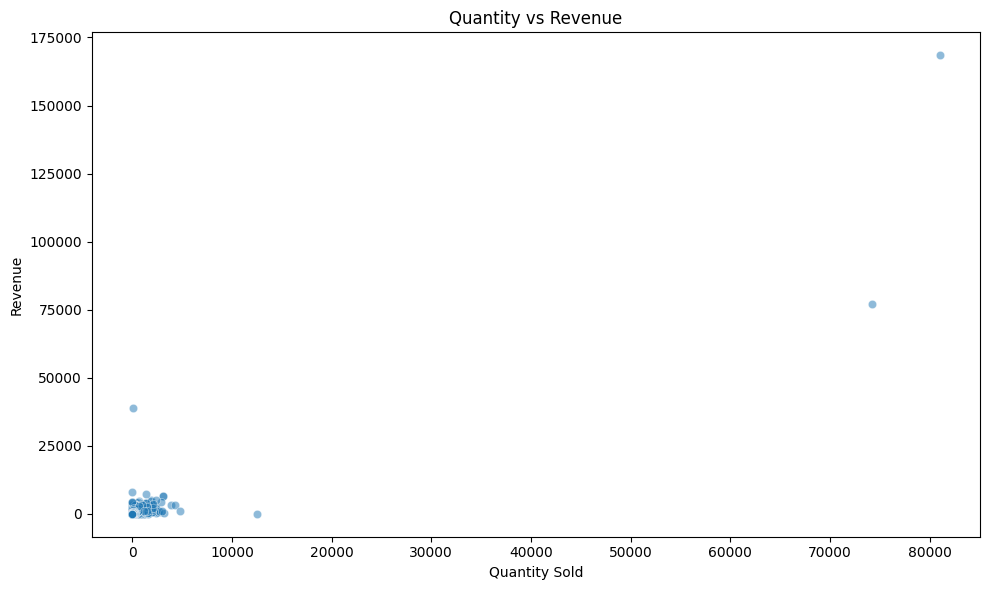

In [11]:
# Quantity vs Revenue scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Quantity', y='Revenue', data=data, alpha=0.5)
plt.title('Quantity vs Revenue')
plt.xlabel('Quantity Sold')
plt.ylabel('Revenue')
plt.tight_layout()
plt.savefig('../Visualization/quantity_vs_revenue.png')
plt.show()


C:\Users\mdhab\AppData\Local\Temp\ipykernel_13144\2676376331.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_revenue.index.astype(str), y=customer_revenue.values, palette='viridis')


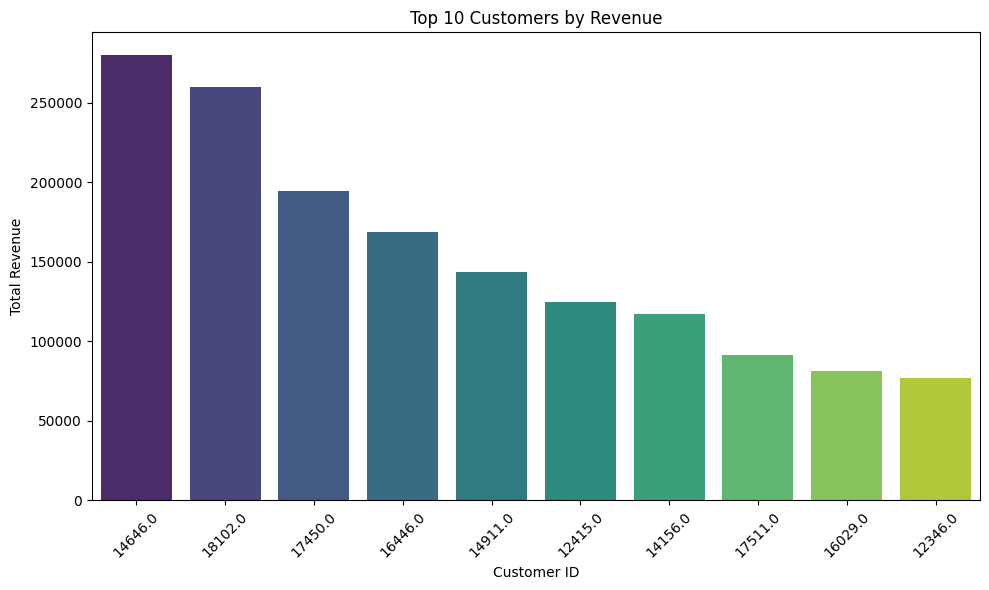

In [17]:
# Revenue by Customer
customer_revenue = data.groupby('Customer ID')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=customer_revenue.index.astype(str), y=customer_revenue.values, palette='viridis')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../Visualization/top_customers.png')
plt.show()


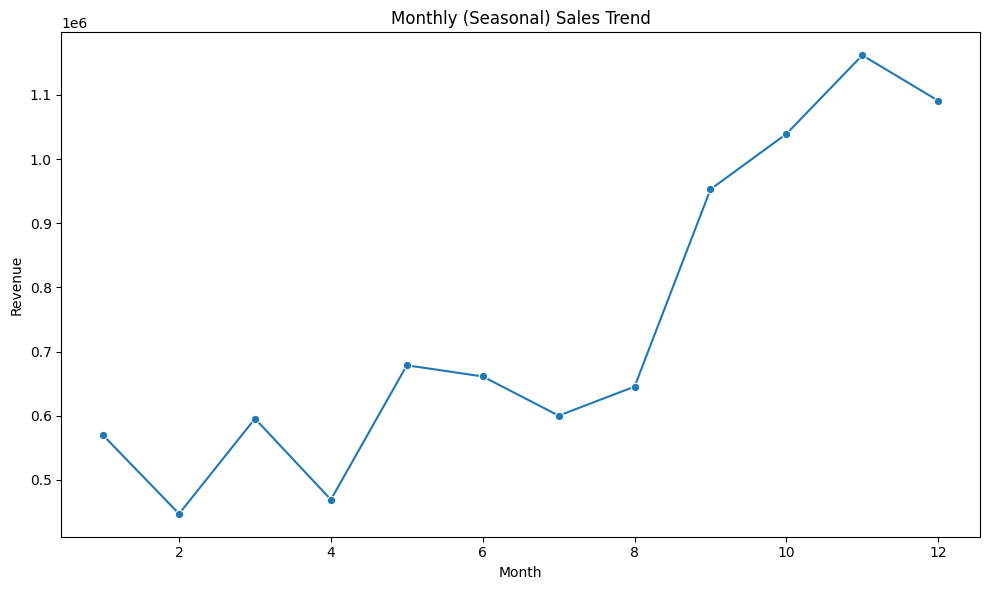

In [18]:
# Extract month from InvoiceDate
data['Month'] = data['InvoiceDate'].dt.month

# Group by month
monthly_sales = data.groupby('Month')['Revenue'].sum()

plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Monthly (Seasonal) Sales Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.tight_layout()
plt.savefig('../Visualization/seasonal_sales_trend.png')
plt.show()
